In [1]:
import numpy as np
import pandas as pd
from scipy import stats
from matplotlib import pylab as plt
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

import math
import sys
%matplotlib inline
sns.set()

In [2]:
pd.set_option('display.max_columns', 2000)

In [3]:
sys.path.append('../method/')
import dataset as ds
import preprocessing as pp
import machine_algorithm as ma

# データ生成

In [4]:
# data_path = '../csv/event_jp.csv'
# df = ds.load_data(data_path,, encoding="UTF-8")

df = pd.read_csv("../csv/event_jp.csv", encoding="shift_jis")

In [5]:
df = df[7:].reset_index().drop(["index"],axis=1)

In [6]:
df = df["event"]

In [7]:
df.unique()

array(['0', '雨', '台風', 'クリスマス', 'イベント', 'イベント,三連休', '三連休', 'お盆', 'お盆,雨',
       '大晦日', '元日', 'GW', 'GW,雨', 'お盆,台風', '交通規制', '祝日'], dtype=object)

In [8]:
event_kinds = df.unique()

event_kinds = event_kinds[[6]]

len(df[df.isin(event_kinds)])

35

In [9]:
df_one_hot_encoded = pd.get_dummies(df)
for n, i in enumerate(df_one_hot_encoded["お盆,台風"]):
    if i == 1:
        # print(df_one_hot_encoded.iloc[n,:])
        df_one_hot_encoded["お盆"][n] = 1
        df_one_hot_encoded["台風"][n] = 1
for n, i in enumerate(df_one_hot_encoded["イベント,三連休"]):
    if i == 1:
        # print(df_one_hot_encoded.iloc[n,:])
        df_one_hot_encoded["イベント"][n] = 1
        df_one_hot_encoded["三連休"][n] = 1
for n, i in enumerate(df_one_hot_encoded["GW,雨"]):
    if i == 1:
        # print(df_one_hot_encoded.iloc[n,:])
        df_one_hot_encoded["GW"][n] = 1
        df_one_hot_encoded["雨"][n] = 1
for n, i in enumerate(df_one_hot_encoded["お盆,雨"]):
    if i == 1:
        # print(df_one_hot_encoded.iloc[n,:])
        df_one_hot_encoded["お盆"][n] = 1
        df_one_hot_encoded["雨"][n] = 1
        
df_one_hot_encoded = df_one_hot_encoded.drop(["お盆,台風"], axis=1)
df_one_hot_encoded = df_one_hot_encoded.drop(["イベント,三連休"], axis=1)
df_one_hot_encoded = df_one_hot_encoded.drop(["GW,雨"], axis=1)
df_one_hot_encoded = df_one_hot_encoded.drop(["お盆,雨"], axis=1)


In [10]:
df_one_hot_encoded.head()

,0,GW,お盆,イベント,クリスマス,三連休,交通規制,元日,台風,大晦日,祝日,雨
0,1,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,1


In [11]:
pd.set_option('display.max_columns', 2000)
pd.set_option('display.max_rows', 2000)

In [12]:
ebi_data = pd.read_csv("../data.csv", encoding="shift_jis")

In [13]:
df_one_hot_encoded = pd.concat([df_one_hot_encoded,ebi_data["date"]], axis=1)

In [14]:
df_one_hot_encoded = df_one_hot_encoded.set_index("date")

In [15]:
df_one_hot_encoded = df_one_hot_encoded.drop(["0"],axis=1)

In [16]:
df_one_hot_encoded.head()

,GW,お盆,イベント,クリスマス,三連休,交通規制,元日,台風,大晦日,祝日,雨
date,,,,,,,,,,,
2017-07-08,0,0,0,0,0,0,0,0,0,0,0
2017-07-09,0,0,0,0,0,0,0,0,0,0,0
2017-07-10,0,0,0,0,0,0,0,0,0,0,0
2017-07-11,0,0,0,0,0,0,0,0,0,0,0
2017-07-12,0,0,0,0,0,0,0,0,0,0,1


In [17]:
# ebi_data =  pd.read_csv("../data.csv", encoding="shift_jis")

In [18]:
ebi_data = ebi_data.set_index("date")

In [19]:
ebi_data.head()

,salesTotal,CustNum,kankou,tabelog,event_type,day1_sales,day1_kankou,day1_tabelog,event_impact
date,,,,,,,,,
2017-07-08,743628.0,334.0,3979.0,932.0,NaN,NaN,2146.0,NaN,0.00
2017-07-09,888732.0,393.0,2146.0,769.0,NaN,743628.0,1418.0,932.0,0.00
2017-07-10,441044.0,220.0,1418.0,602.0,NaN,888732.0,1611.0,769.0,0.00
2017-07-11,413247.0,196.0,1611.0,780.0,NaN,441044.0,1646.0,602.0,0.00
2017-07-12,347005.0,152.0,1646.0,841.0,NaN,413247.0,1678.0,780.0,-3.59


In [20]:
event_data = pd.merge(ebi_data, df_one_hot_encoded,on="date")

In [21]:
event_data.head()


,salesTotal,CustNum,kankou,tabelog,event_type,day1_sales,day1_kankou,day1_tabelog,event_impact,GW,お盆,イベント,クリスマス,三連休,交通規制,元日,台風,大晦日,祝日,雨
date,,,,,,,,,,,,,,,,,,,,
2017-07-08,743628.0,334.0,3979.0,932.0,NaN,NaN,2146.0,NaN,0.00,0,0,0,0,0,0,0,0,0,0,0
2017-07-09,888732.0,393.0,2146.0,769.0,NaN,743628.0,1418.0,932.0,0.00,0,0,0,0,0,0,0,0,0,0,0
2017-07-10,441044.0,220.0,1418.0,602.0,NaN,888732.0,1611.0,769.0,0.00,0,0,0,0,0,0,0,0,0,0,0
2017-07-11,413247.0,196.0,1611.0,780.0,NaN,441044.0,1646.0,602.0,0.00,0,0,0,0,0,0,0,0,0,0,0
2017-07-12,347005.0,152.0,1646.0,841.0,NaN,413247.0,1678.0,780.0,-3.59,0,0,0,0,0,0,0,0,0,0,1


In [22]:
event_list = list(event_data.columns)[8:]
print(event_list)

['event_impact', 'GW', 'お盆', 'イベント', 'クリスマス', '三連休', '交通規制', '元日', '台風', '大晦日', '祝日', '雨']


In [23]:
# if event_data[event_data["雨"] == 1]:
#     event_data["event_impact"] == -1

# event_data[event_data["雨"] == 1]
event_index = event_data.index[event_data['雨'] == 1]



In [24]:
event_data["event_impact"] = 0
for i in event_list:
    event_index = event_data.index[event_data[i] == 1]
    if i == "GW":
        for j in event_index:
            event_data["event_impact"][j] += 20
    elif i == "お盆":
        for j in event_index:
            event_data["event_impact"][j] += 6
    elif i == "イベント":
        for j in event_index:
            event_data["event_impact"][j] += 15
    elif i == "クリスマス":
        for j in event_index:
            event_data["event_impact"][j] += 17
    elif i == "三連休":
        for j in event_index:
            event_data["event_impact"][j] += 11
    elif i == "交通規制":
        for j in event_index:
            event_data["event_impact"][j] += -3
    elif i == "元日":
        for j in event_index:
            event_data["event_impact"][j] += 18
    elif i == "台風":
        for j in event_index:
            event_data["event_impact"][j] += -10
    elif i == "大晦日":
        for j in event_index:
            event_data["event_impact"][j] += 16
    elif i == "祝日":
        for j in event_index:
            event_data["event_impact"][j] += 7
    elif i == "雨":
        for j in event_index:
            event_data["event_impact"][j] += -5
    

/var/folders/tv/xbz88bwn3bv07cd4ktfz_dcc0000gn/T/ipykernel_44027/850890521.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  event_data["event_impact"][j] += 20
/var/folders/tv/xbz88bwn3bv07cd4ktfz_dcc0000gn/T/ipykernel_44027/850890521.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  event_data["event_impact"][j] += 6
/var/folders/tv/xbz88bwn3bv07cd4ktfz_dcc0000gn/T/ipykernel_44027/850890521.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ve

In [25]:
event_data.to_csv('../ei_make/data_before_split.csv')




In [26]:
all_data = pd.read_csv('../data.csv')

all_data = all_data.loc[:,['date','CustNum']]

# date列をタイムスタンプ型に
def timestamp_data(df):
    index_lst = [] 
    for i in df['date']:
        index_lst.append(pd.to_datetime(i)) 
    split_df = pd.DataFrame(list(zip(index_lst,df.iloc[:,1])), columns = ['date','CustNum'])
    return split_df

all_data = timestamp_data(all_data)
all_data = all_data.set_index('date')


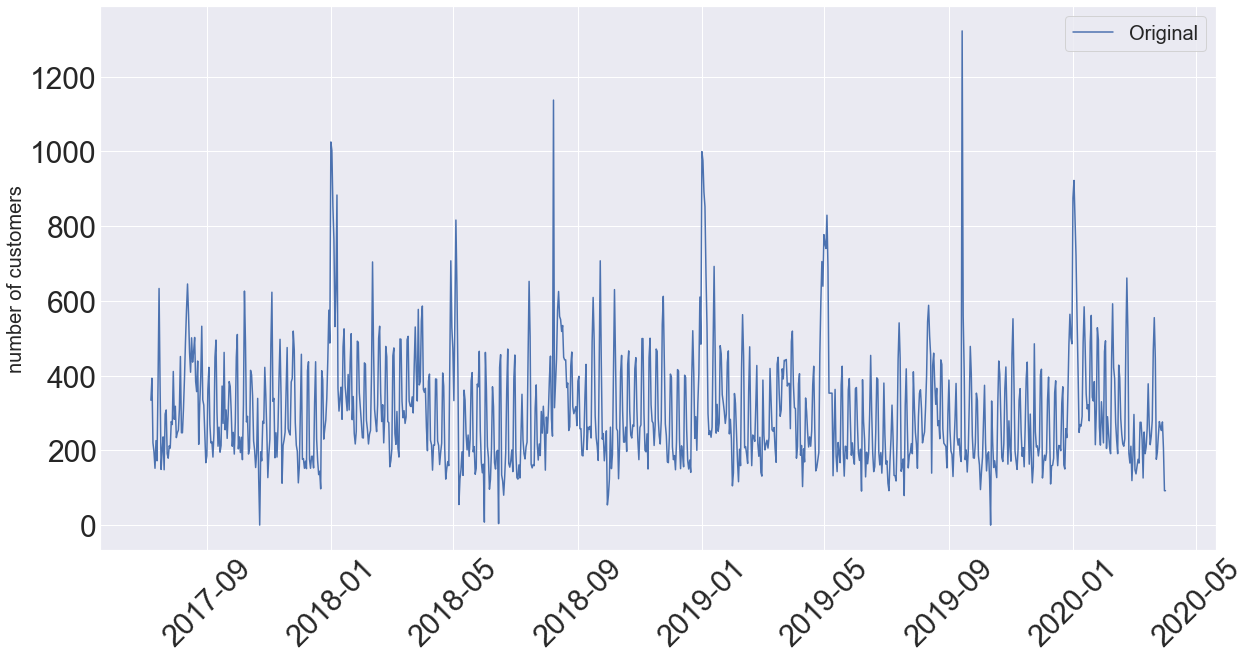

In [31]:
import datetime

fig, ax = plt.subplots(figsize=(20, 10))
plt.plot(all_data, label='Original')

plt.ylabel('number of customers', fontsize=20)
plt.tick_params(length=0)
plt.legend(fontsize=20,ncol=2)
plt.tick_params(labelsize=30)
plt.xticks(rotation=45)
fig.savefig("Customer_num.png",bbox_inches="tight")

In [26]:
event_train = event_data[:730]
event_test = event_data[730:]

In [27]:
len(event_train)

730

In [28]:
len(event_test)

269

In [29]:
event_train.to_csv('../ei_make/event_train.csv')
event_test.to_csv('../ei_make/event_test.csv')